In [1]:
import torch
import matplotlib.pyplot as plt


In [2]:
from data_loader import full_dataset, train_dataset, valid_dataset

#summary statistics of the dataset
print(f"Number of training samples: {len(train_dataset)}")
print(f"Number of validation samples: {len(valid_dataset)}")
print(f"Class labels: {full_dataset.class_to_idx}")

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

/Users/ozgur/opt/anaconda3/lib/python3.9/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: 'dlopen(/Users/ozgur/opt/anaconda3/lib/python3.9/site-packages/torchvision/image.so, 0x0006): Symbol not found: __ZN3c106detail19maybe_wrap_dim_slowIxEET_S2_S2_b
  Referenced from: <CC4BC91F-8B6A-3F9A-B9EB-A2B9D578E202> /Users/ozgur/opt/anaconda3/lib/python3.9/site-packages/torchvision/image.so
  Expected in:     <408F81C0-C6C8-33EF-B02E-B683F7178A71> /Users/ozgur/opt/anaconda3/lib/python3.9/site-packages/torch/lib/libc10.dylib'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


Number of training samples: 8000
Number of validation samples: 1999
Class labels: {'damaged': 0, 'no_damage': 1}
Using device: cpu
Number of training samples: 8000
Number of validation samples: 1999
Class labels: {'damaged': 0, 'no_damage': 1}
Using device: cpu


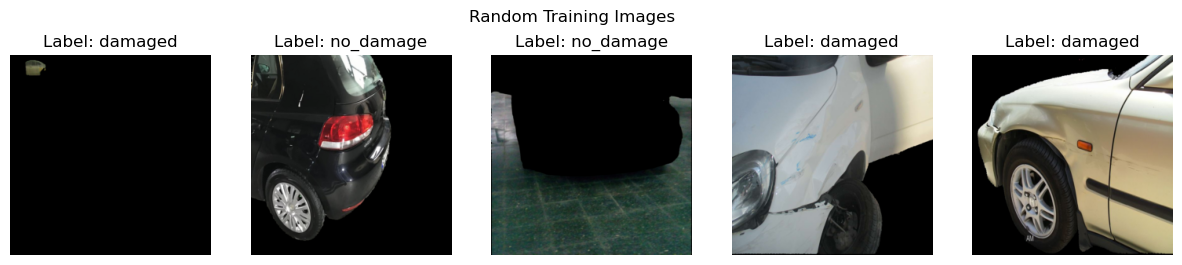

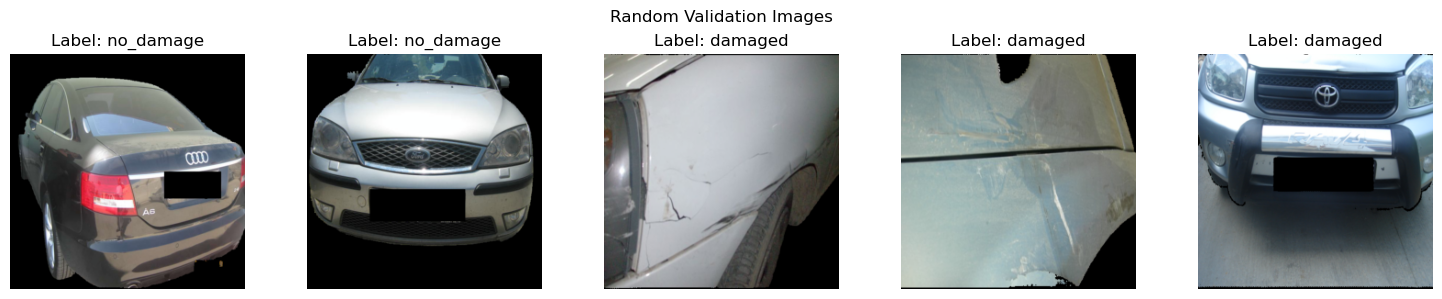

In [3]:
from data_loader import show_random_images

#show random training images
show_random_images(train_dataset, title="Random Training Images")

# Show random validation images
show_random_images(valid_dataset, title="Random Validation Images")

plt.tight_layout()
plt.show()

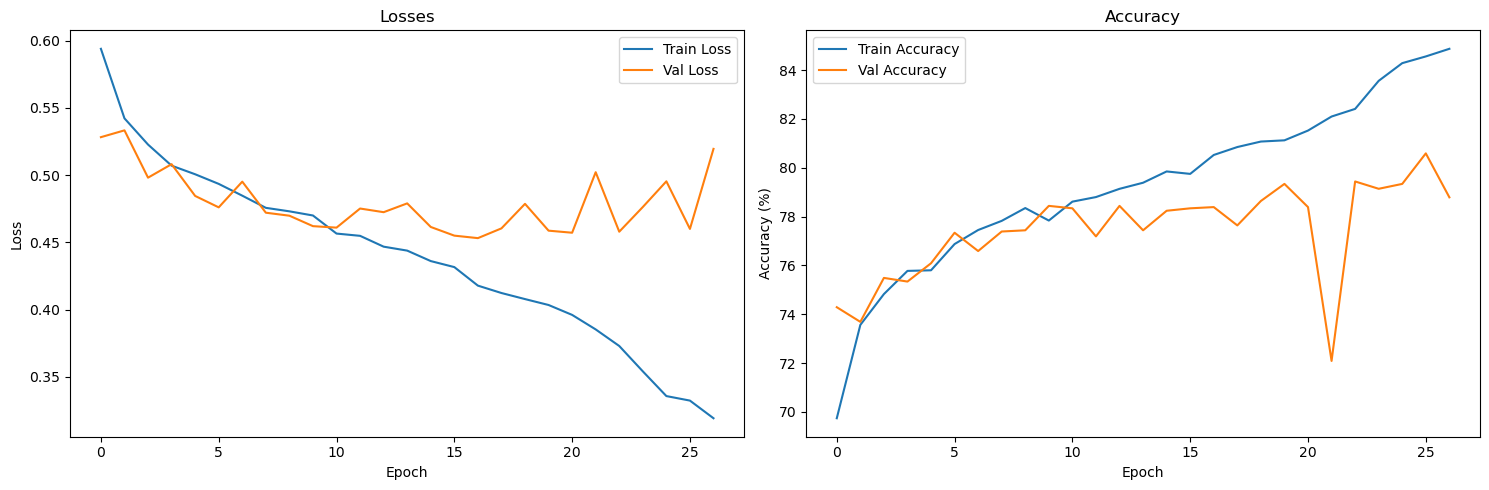

Epoch 27/50
Train Acc: 84.9% | Val Acc: 78.8%
Train Loss: 0.3193 | Val Loss: 0.5195

Early stopping at epoch 27
Best model was saved at epoch 17 with validation loss: 0.4532
Model saved to models/final_model.pth


In [4]:
from train_model import quick_train_model
from model import cnn_model

model = quick_train_model(cnn_model)

Model loaded from models/best_model.pth


/Users/ozgur/opt/anaconda3/lib/python3.9/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: 'dlopen(/Users/ozgur/opt/anaconda3/lib/python3.9/site-packages/torchvision/image.so, 0x0006): Symbol not found: __ZN3c106detail19maybe_wrap_dim_slowIxEET_S2_S2_b
  Referenced from: <CC4BC91F-8B6A-3F9A-B9EB-A2B9D578E202> /Users/ozgur/opt/anaconda3/lib/python3.9/site-packages/torchvision/image.so
  Expected in:     <408F81C0-C6C8-33EF-B02E-B683F7178A71> /Users/ozgur/opt/anaconda3/lib/python3.9/site-packages/torch/lib/libc10.dylib'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(
/Users/ozgur/opt/anaconda3/lib/python3.9/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: 'dlopen(/Users/ozgur/opt/anaconda3/lib

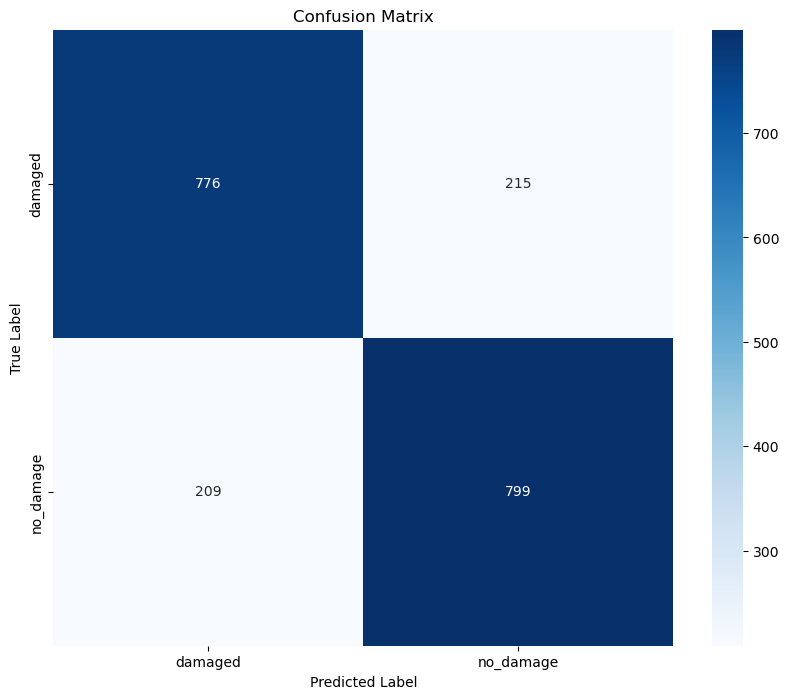


Overall Accuracy: 78.79%
damaged Accuracy: 78.30%
no_damage Accuracy: 79.27%


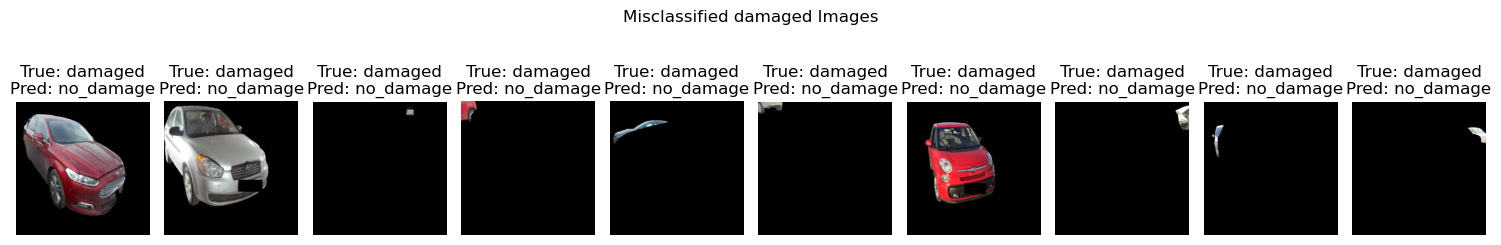

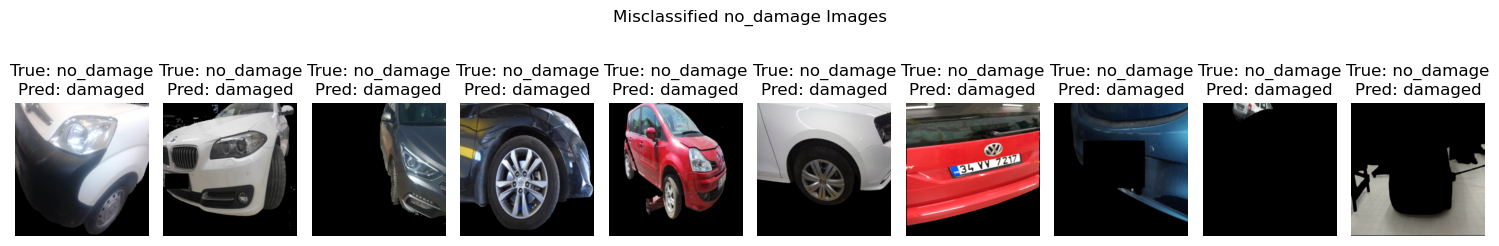

In [5]:
from evaluation import evaluate_model
from data_loader import valid_loader
from model import load_model

best_model = load_model('best_model.pth')

evaluate_model(model, valid_loader)

/Users/ozgur/opt/anaconda3/lib/python3.9/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: 'dlopen(/Users/ozgur/opt/anaconda3/lib/python3.9/site-packages/torchvision/image.so, 0x0006): Symbol not found: __ZN3c106detail19maybe_wrap_dim_slowIxEET_S2_S2_b
  Referenced from: <CC4BC91F-8B6A-3F9A-B9EB-A2B9D578E202> /Users/ozgur/opt/anaconda3/lib/python3.9/site-packages/torchvision/image.so
  Expected in:     <408F81C0-C6C8-33EF-B02E-B683F7178A71> /Users/ozgur/opt/anaconda3/lib/python3.9/site-packages/torch/lib/libc10.dylib'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(
/Users/ozgur/opt/anaconda3/lib/python3.9/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: 'dlopen(/Users/ozgur/opt/anaconda3/lib

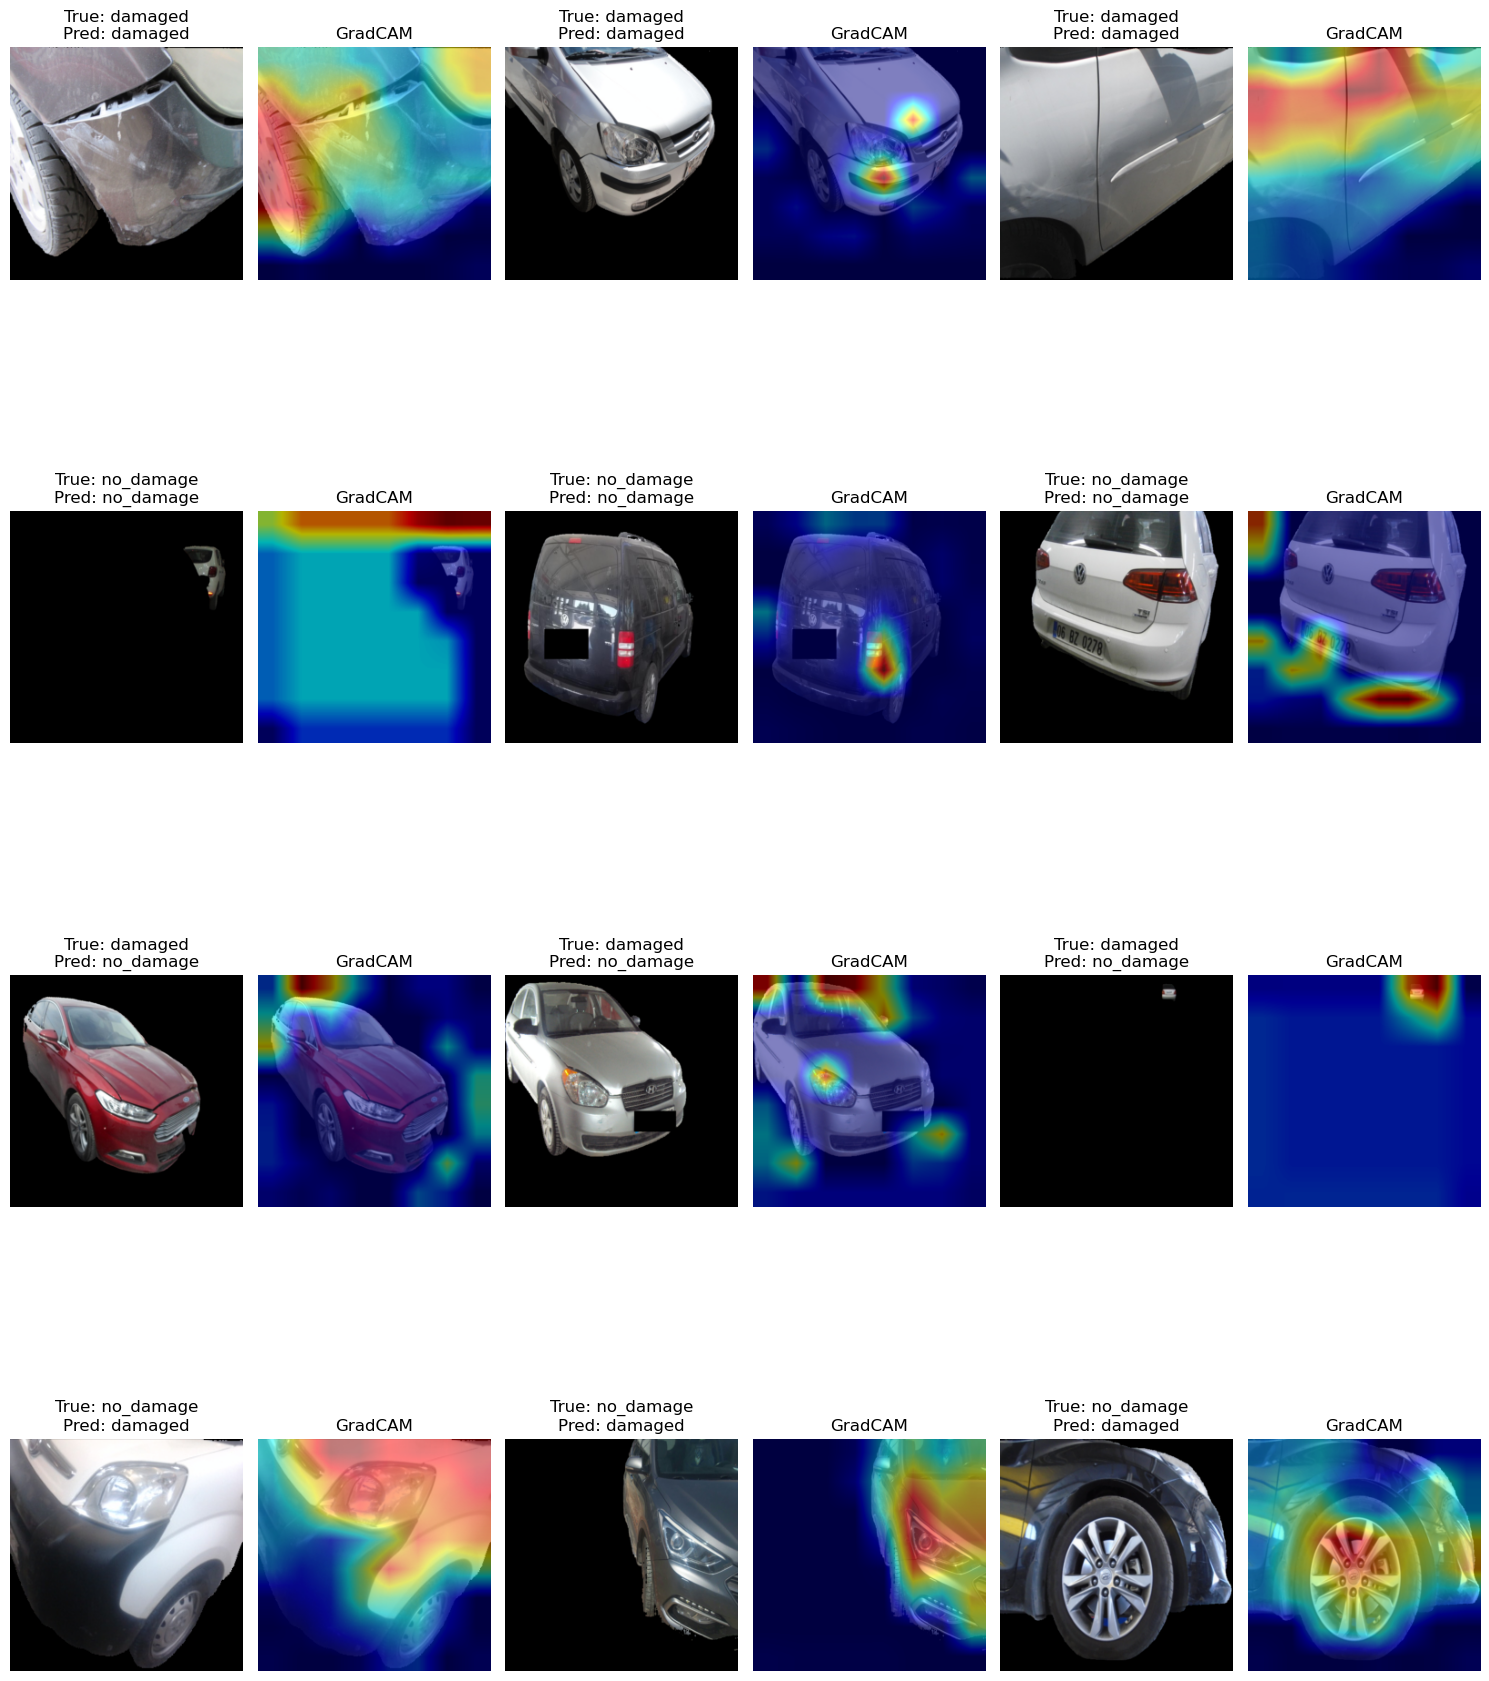

In [7]:
from analyze_predictions import visualize_gradcam_predictions

visualize_gradcam_predictions(best_model, valid_loader)